In [7]:
import numpy as np
import pandas as pd
import os

# Open the txt file and convert it to a dataframe first
headings = ['Mid_Sem', 'End_Sem', 'Pass/Fail']
df = pd.read_csv('/kaggle/input/student-marks/marks.txt', sep = ",",names = headings)

df

,Mid_Sem,End_Sem,Pass/Fail
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


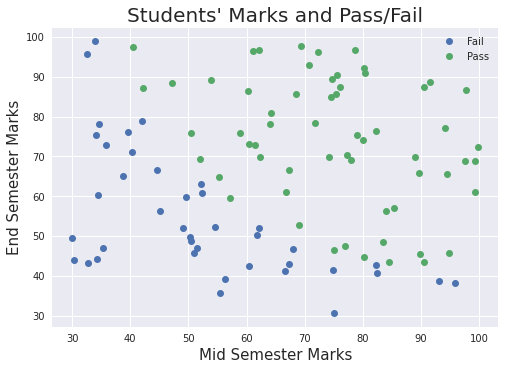

In [8]:
# Visualise the data first to see any patterns or trends

import matplotlib.pyplot as plt
plt.style.use("seaborn")


result = lambda x: 'Pass' if x == 1 else 'Fail'
groups = df.groupby("Pass/Fail")
for PorF, group in groups:
    plt.plot(group["Mid_Sem"], group["End_Sem"], marker="o", linestyle="", label= result(PorF))
plt.legend()
plt.xlabel("Mid Semester Marks", fontsize = 15)
plt.ylabel("End Semester Marks", fontsize = 15)
plt.title("Students' Marks and Pass/Fail", fontsize = 20)
plt.show()

In [ ]:
# Looking at the data above, we can see a distincting that students pass 
# if they score roughly about 60% for their end and mid semester exams combined
# Example: Mid Sem = 90+, End Sem = 40+ , Average = 60+ --> Pass

In [14]:
# Since this is a Supervised ML where we have the answers, we can just split it into training/test set 
# (Ill just go for a simple 80:20 ratio)
# Since there are only 2 outcomes, we will use a classifier ML and seems to me like Support Vector Machines
# would be a good fit as I can see a linear svm that can be formed in the middle of the graph.
from sklearn import svm
from sklearn.model_selection import train_test_split

# Get our feature dataframe as 2D array for the fit together with the dependent variable P/F
X = np.asarray(df[["Mid_Sem", "End_Sem"]])
y = np.asarray(df["Pass/Fail"])

# Split the training/ test data 
# Went with (80:20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Now we model with svm 
# For my reference:
#     gamma --> Gamma is used when we use the Gaussian RBF kernel
#               Gamma decides that how much curvature we want in a decision boundary.
#               low Gamma = less curvature
#     C     --> Control Error
#               low C = less error (likewise for high)
#               Many ways to find best C ()
#     *values chosen for both usually 0.001, 0.01, 0.1, 1, 10, 100***
#     
classifier = svm.SVC(kernel = "linear", C = 1)
classifier.fit(X_train,y_train)

# Get mean accuracy on given test data and labels
classifier.score(X_test, y_test)

0.95

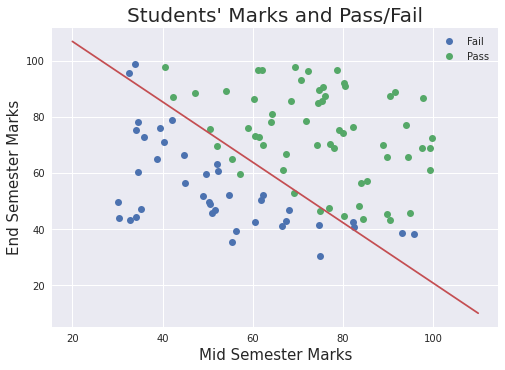

In [15]:
# We should see the graph to see how accurate the hyperplane is
result = lambda x: 'Pass' if x == 1 else 'Fail'
groups = df.groupby("Pass/Fail")
for PorF, group in groups:
    plt.plot(group["Mid_Sem"], group["End_Sem"], marker="o", linestyle="", label= result(PorF))
plt.legend()
plt.xlabel("Mid Semester Marks", fontsize = 15)
plt.ylabel("End Semester Marks", fontsize = 15)
plt.title("Students' Marks and Pass/Fail", fontsize = 20)

# plotting the hyperplane
# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(20, 110)
yy = a * xx - (classifier.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)

plt.show()

Conclusion:

I have learnt how to use svm on a very basic level. However, there are much improvements that can be made to this. 

I could maybe use a nonlinear svm that would help me avoid underfitting and optunity library to optimize C (or even gamma) for svm(find out more on [optunity](https://optunity.readthedocs.io/en/latest/)). 

I could also use k folds cross validation which allows me to test on the entire data instead of 20% of it and further improve our accuracy of prediction with more evaluations to check on (also checks consistency). Cross validation might also be used to find the optimal C for svm as well through grid search for example. 